<a href="https://colab.research.google.com/github/aziz16abdellaoui/Login-page/blob/main/detection%20from%20images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

In [ ]:
!kaggle datasets download -d puneet6060/Intel-Image-Classification

 97% 335M/346M [00:04<00:00, 31.4MB/s]
100% 346M/346M [00:04<00:00, 78.2MB/s]


In [ ]:
!unzip Intel-Image-Classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
train_dir = pathlib.Path("seg_train/seg_train")
test_dir = pathlib.Path("seg_test/seg_test")
train_image_count = len(list(train_dir.glob('*/*.jpg')))
test_image_count = len(list(test_dir.glob('*/*.jpg')))
print(train_image_count)
print(test_image_count)

14034
3000


In [ ]:
batch_size = 64
img_height = 150
img_width = 150

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,validation_split=0.2,subset="training",seed=123,
                                                       image_size=(img_height, img_width),batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(train_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height, img_width),batch_size=batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Found 3000 files belonging to 6 classes.


In [ ]:
class_names = train_ds.class_names

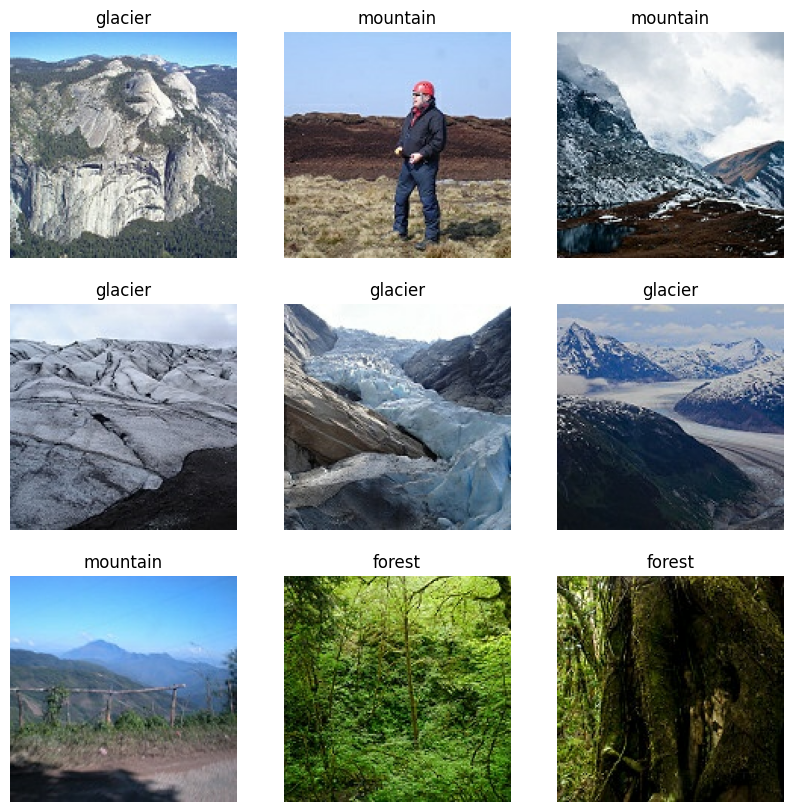

In [ ]:
plt.figure (figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images [i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")